In [45]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# read in the data
df = pd.read_csv('movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [47]:
# missing data 
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [48]:
# data types 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [49]:
# Fill missing values

df['budget'] = df['budget'].fillna(df['budget'].median())
df['gross'] = df['gross'].fillna(df['gross'].median())
df['votes'] = df['votes'].fillna(df['votes'].median())
df['runtime'] = df['runtime'].fillna(df['runtime'].median())
df['score'] = df['score'].fillna(df['score'].median())

In [50]:
# change data type of columns 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [51]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [52]:
df = df.sort_values(by=['gross'],inplace=False, ascending=False)

In [53]:
pd.set_option('display.max_rows',None)

In [54]:
#check if there are duplicates and drop it 
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


<function matplotlib.pyplot.show(close=None, block=None)>

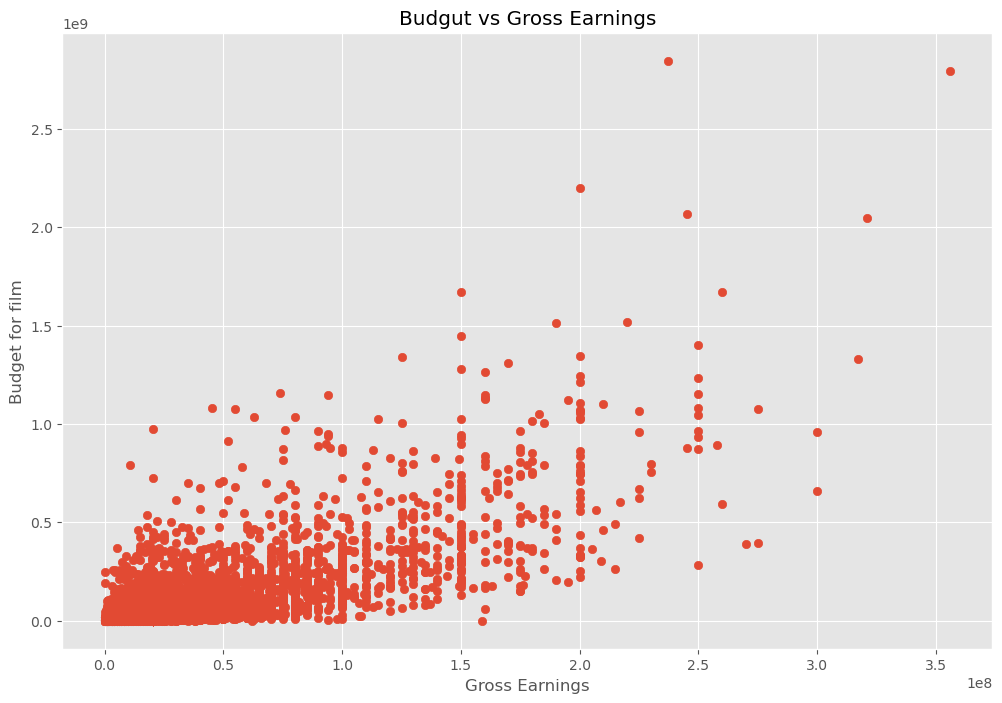

In [11]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budgut vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')

plt.show

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


<Axes: xlabel='gross', ylabel='budget'>

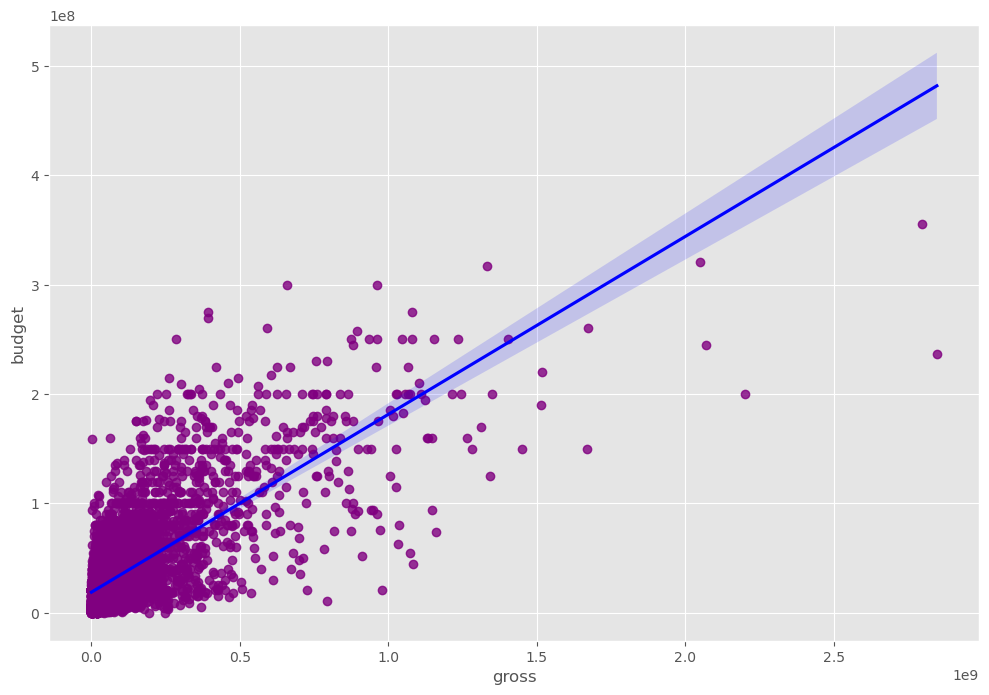

In [13]:
# plot budget vs gross using seaborn
sns.regplot(
    x='gross',
    y='budget',
    data=df,
    scatter_kws={"color": "purple"},
    line_kws={"color": "blue"}
)

<Axes: xlabel='score', ylabel='gross'>

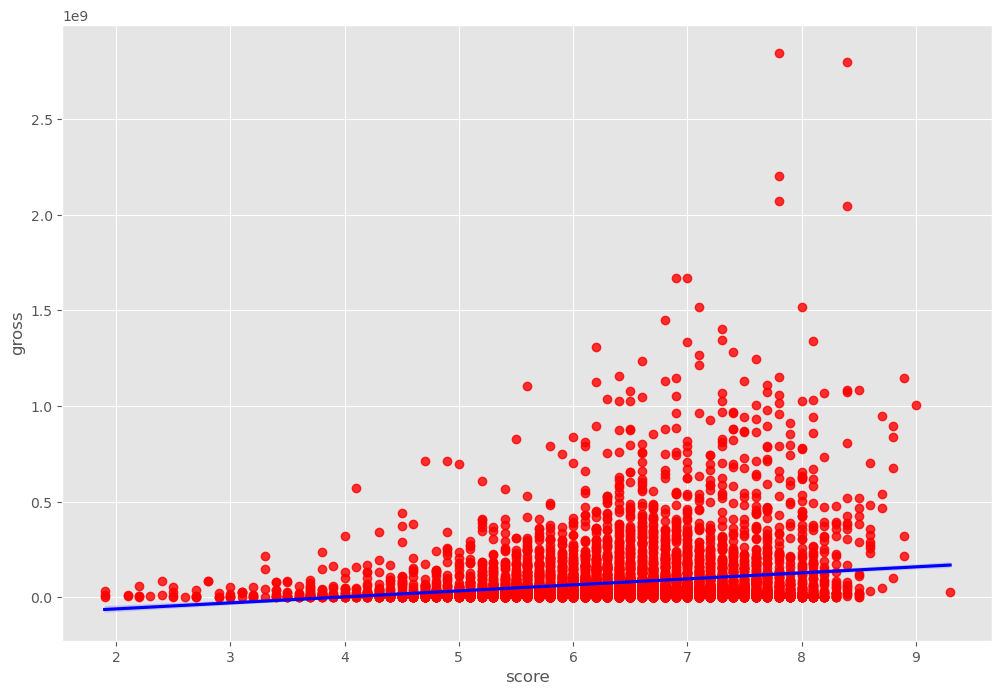

In [14]:

sns.regplot(x="score", 
            y="gross",
            data=df,
    scatter_kws={"color": "red"},
    line_kws={"color": "blue"}
           )

In [15]:
# let's sart looking at correlation 

df.corr(numeric_only=True , method='pearson')

# methods of correlation  : #pearson , kendall , spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.098013,0.222573,0.291690,0.259504,0.120662
score,0.098013,1.000000,0.409157,0.061931,0.185563,0.399407
votes,0.222573,0.409157,1.000000,0.460968,0.632120,0.309151
budget,0.291690,0.061931,0.460968,1.000000,0.745881,0.273371
gross,0.259504,0.185563,0.632120,0.745881,1.000000,0.244380
runtime,0.120662,0.399407,0.309151,0.273371,0.244380,1.000000


In [16]:
df.corr(numeric_only=True , method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067628,0.331208,0.185818,0.196205,0.097157
score,0.067628,1.000000,0.300087,-0.001776,0.084530,0.283447
votes,0.331208,0.300087,1.000000,0.268941,0.530052,0.198120
budget,0.185818,-0.001776,0.268941,1.000000,0.376115,0.192008
gross,0.196205,0.084530,0.530052,0.376115,1.000000,0.165143
runtime,0.097157,0.283447,0.198120,0.192008,0.165143,1.000000


In [17]:
df.corr(numeric_only=True , method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099021,0.469557,0.258703,0.287788,0.142941
score,0.099021,1.000000,0.428088,-0.002932,0.123997,0.399632
votes,0.469557,0.428088,1.000000,0.381894,0.722490,0.289986
budget,0.258703,-0.002932,0.381894,1.000000,0.520018,0.270410
gross,0.287788,0.123997,0.722490,0.520018,1.000000,0.241429
runtime,0.142941,0.399632,0.289986,0.270410,0.241429,1.000000


In [18]:
#hight correlation budget vs gross

<function matplotlib.pyplot.show(close=None, block=None)>

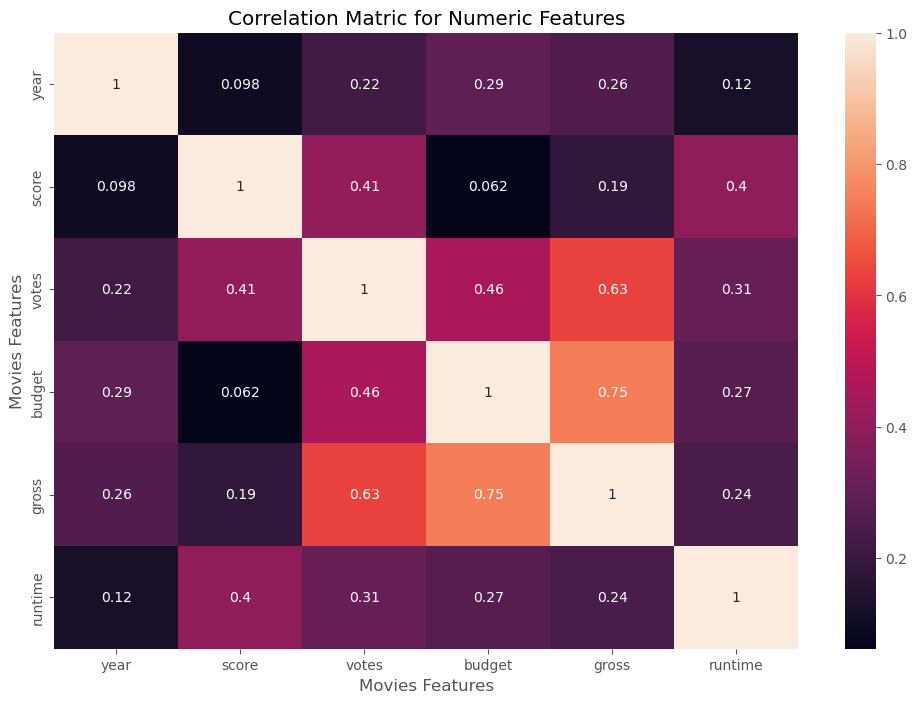

In [19]:
correaltion_matrrix = df.corr(numeric_only=True , method='pearson')

sns.heatmap(correaltion_matrrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')

plt.show

In [20]:
#looks at company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [21]:

# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.308696,0.136414,0.224009,0.643199,0.095887,0.575398,0.698283,0.769491,0.630783,0.173369,0.108137,0.978586,0.664165,0.066111
rating,0.308696,1.000000,-0.011837,0.038548,0.240284,-0.066684,0.119347,0.235320,0.257426,0.247335,0.160630,0.088525,0.315180,0.275632,0.031081
genre,0.136414,-0.011837,1.000000,0.087749,0.090328,0.062624,0.148710,0.093015,0.086682,0.098418,-0.073575,0.099472,0.133341,0.058791,0.004097
year,0.224009,0.038548,0.087749,1.000000,0.300641,0.077407,0.327449,0.144511,0.185069,0.201303,-0.056949,0.058449,0.235248,0.090915,0.032385
released,0.643199,0.240284,0.090328,0.300641,1.000000,0.064882,0.439199,0.483231,0.528535,0.452224,0.154107,0.077345,0.657428,0.443282,0.041164
score,0.095887,-0.066684,0.062624,0.077407,0.064882,1.000000,0.232906,0.142954,0.093590,0.094196,-0.101039,-0.001663,0.101639,0.020442,0.036763
votes,0.575398,0.119347,0.148710,0.327449,0.439199,0.232906,1.000000,0.473181,0.501347,0.427308,0.043846,0.033968,0.591959,0.370396,0.066139
director,0.698283,0.235320,0.093015,0.144511,0.483231,0.142954,0.473181,1.000000,0.671774,0.545583,0.180205,0.040921,0.714797,0.580796,0.072578
writer,0.769491,0.257426,0.086682,0.185069,0.528535,0.093590,0.501347,0.671774,1.000000,0.557308,0.185689,0.059423,0.784943,0.584682,0.049187
star,0.630783,0.247335,0.098418,0.201303,0.452224,0.094196,0.427308,0.545583,0.557308,1.000000,0.211693,0.058586,0.645959,0.536537,0.068629


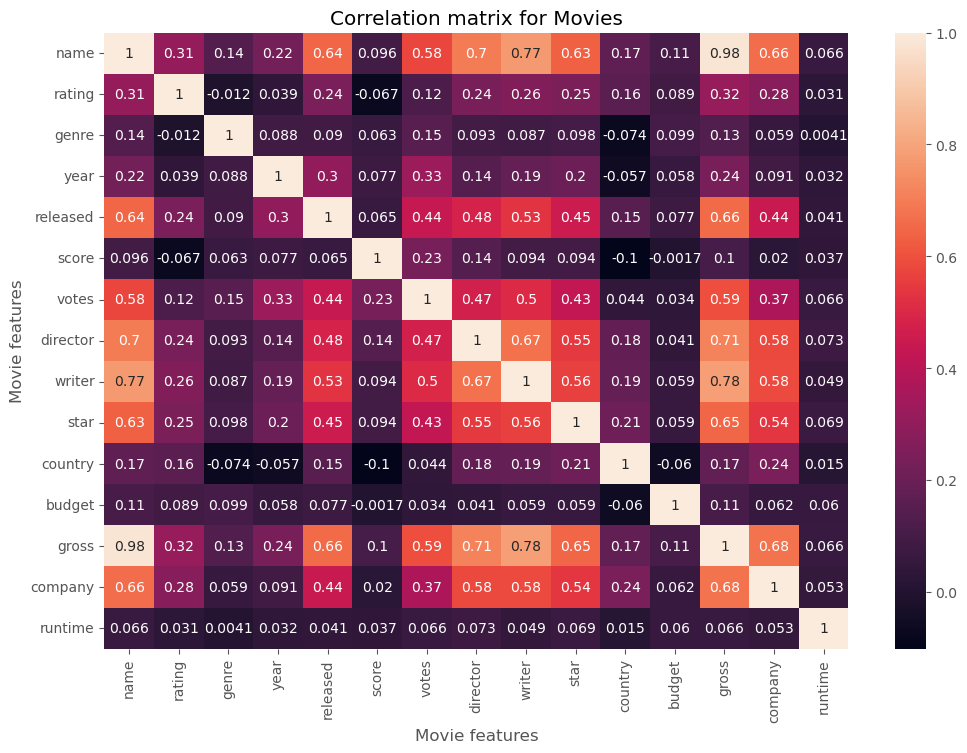

In [22]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [23]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.308696
          genre       0.136414
          year        0.224009
          released    0.643199
          score       0.095887
          votes       0.575398
          director    0.698283
          writer      0.769491
          star        0.630783
          country     0.173369
          budget      0.108137
          gross       0.978586
          company     0.664165
          runtime     0.066111
rating    name        0.308696
          rating      1.000000
          genre      -0.011837
          year        0.038548
          released    0.240284
          score      -0.066684
          votes       0.119347
          director    0.235320
          writer      0.257426
          star        0.247335
          country     0.160630
          budget      0.088525
          gross       0.315180
          company     0.275632
          runtime     0.031081
genre     name        0.136414
          rating     -0.011837
        

In [24]:

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country   score      -0.101039
score     country    -0.101039
country   genre      -0.073575
genre     country    -0.073575
score     rating     -0.066684
rating    score      -0.066684
budget    country    -0.059835
country   budget     -0.059835
year      country    -0.056949
country   year       -0.056949
rating    genre      -0.011837
genre     rating     -0.011837
budget    score      -0.001663
score     budget     -0.001663
runtime   genre       0.004097
genre     runtime     0.004097
runtime   country     0.015008
country   runtime     0.015008
company   score       0.020442
score     company     0.020442
runtime   rating      0.031081
rating    runtime     0.031081
year      runtime     0.032385
runtime   year        0.032385
votes     budget      0.033968
budget    votes       0.033968
runtime   score       0.036763
score     runtime     0.036763
rating    year        0.038548
year      rating      0.038548
budget    director    0.040921
director  budget      0.040921
runtime 

In [25]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes     writer      0.501347
writer    votes       0.501347
          released    0.528535
released  writer      0.528535
company   star        0.536537
star      company     0.536537
director  star        0.545583
star      director    0.545583
          writer      0.557308
writer    star        0.557308
name      votes       0.575398
votes     name        0.575398
company   director    0.580796
director  company     0.580796
company   writer      0.584682
writer    company     0.584682
votes     gross       0.591959
gross     votes       0.591959
name      star        0.630783
star      name        0.630783
released  name        0.643199
name      released    0.643199
gross     star        0.645959
star      gross       0.645959
released  gross       0.657428
gross     released    0.657428
name      company     0.664165
company   name        0.664165
director  writer      0.671774
writer    director    0.671774
gross     company     0.676787
company   gross       0.676787
director

In [26]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56511627563
Universal Pictures           52534394647
Columbia Pictures            43008941346
Paramount Pictures           40513813172
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9270641619
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [55]:
df.groupby(['company', 'year'])[["gross"]].sum().head(200)


gross
company                                    year           
"DIA" Productions GmbH & Co. KG            2003   44350926
"Weathering With You" Film Partners        2019  193457467
.406 Production                            1996      10580
1+2 Seisaku Iinkai                         2000    1196218
10 West Studios                            2010     814906
120 Films                                  2002    6479328
120dB Films                                2009      26676
                                           2016     368372
13 Productions                             2000      25461
1492 Pictures                              1996  129832389
                                           1999   87423861
1818 Productions                           1983   12232628
19 Entertainment                           2003    4928883
1978 Films                                 2017   40656399
1984 Private Defense Contractors           2014   58834384
1992 Number Four Limited Partnership       1995    4686937
2 Loop Films                               2002     264349
2.0 Entertainment                          2019  122810399
2.4.7. Films                               2007   22783978
2003 Productions                           2004   69424389
20th Century Studios                       2020  111105497
21 Laps Entertainment                      2014   41296320
                                           2018   41142379
21st Century Film Corporation              1989    3953745
                                           1990    7658401
21st Century Films                         1994    1702394
25th Hour Productions                      2002   23932055
26 Films                                   2009   20458873
2929 Productions                           2007    7248490
                                           2008   28705178
                                           2014    5092129
2DUX²                                      2016     678150
                                           2018  197744377
3 Arts Entertainment                       1996   60209334
                                           1997   75812433
                                           2001   71186502
                                           2010     649626
                                           2013    3909596
                                           2014  161459297
                                           2015   36606743
                                           2019   22386555
3 Miles Apart Productions Ltd.             1999    8408835
3311 Productions                           2013    3114953
                                           2017    5042014
360 Pictures                               2007    9669758
391 Productions                            1998    1960216
                                           1999      92442
3B Productions                             1999   20205757
                                           2003     167999
3Mark Entertainment                        2001    4760014
4 1/2 Film                                 2006    1297260
4 Kids Entertainment                       1999  133949270
40 Acres & A Mule Filmworks                1986    7137502
                                           1989   37295445
                                           1995   15403436
                                           1999   34573780
                                           2000   27728118
                                           2004    1526951
49th Parallel Productions                  1999      60279
4Kids Entertainment                        2007   95802916
4k Films                                   2001     270811
7 Arts International                       1999     206128
7 Films Cinéma                             1987     519596
                                           2000    3033646
7DM Studios                                2019      38901
8383 Productions                           2012    1944287
88 Productions                           

In [28]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

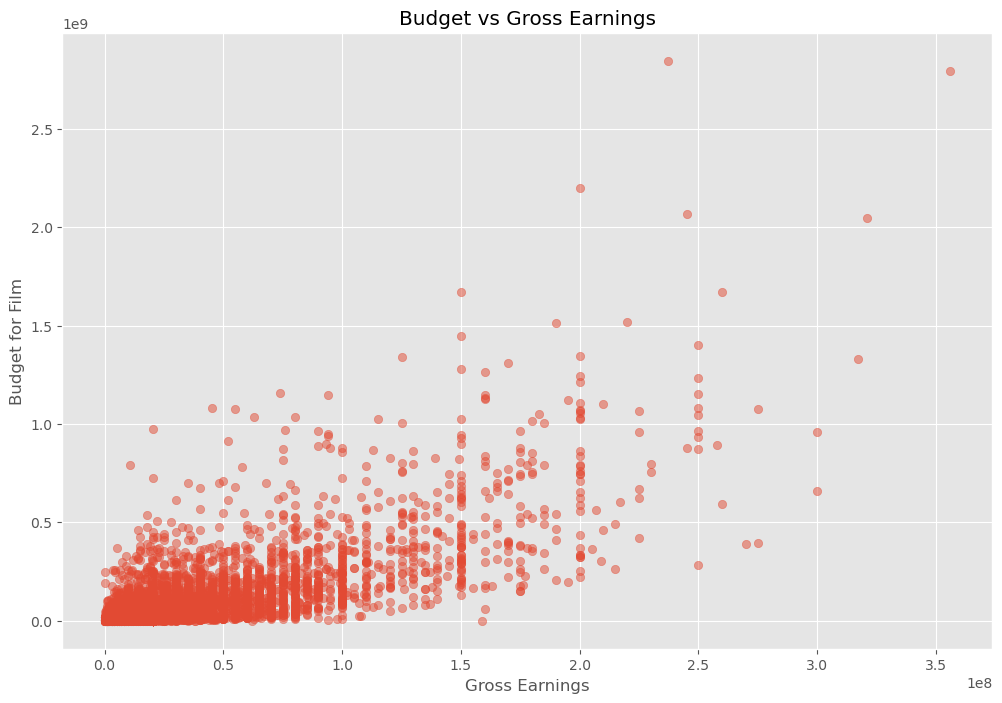

In [29]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [30]:

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149


In [31]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149


In [32]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017105,0.013056,0.009079,0.009081,0.006472,-0.010737,0.020921,0.006601,0.009211,0.010335
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001440,0.033513,0.019483,-0.005921,0.013405,0.081244,-0.108776,-0.097213,-0.032943,0.062131
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145291,-0.015258,0.006567,-0.005477,-0.037615,-0.328484,-0.233385,-0.071067,-0.052719
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.098013,0.222573,-0.020795,-0.008656,-0.027242,-0.070938,0.291690,0.259504,-0.010431,0.120662
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042824,0.015959,-0.001478,-0.002404,0.015777,-0.020427,0.011120,0.000806,-0.010474,0.000990
score,0.017105,-0.001440,0.027965,0.098013,0.042824,1.000000,0.409157,0.009540,0.019361,-0.001636,-0.133323,0.061931,0.185563,0.000960,0.399407
votes,0.013056,0.033513,-0.145291,0.222573,0.015959,0.409157,1.000000,0.000316,0.001039,-0.019196,0.073562,0.460968,0.632120,0.133336,0.309151
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009540,0.000316,1.000000,0.299067,0.039234,0.017490,-0.003584,-0.014758,0.004404,0.017611
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019361,0.001039,0.299067,1.000000,0.027245,0.015343,-0.030641,-0.023064,0.005646,-0.003527
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001636,-0.019196,0.039234,0.027245,1.000000,-0.012998,-0.018534,-0.001529,0.012442,0.010151


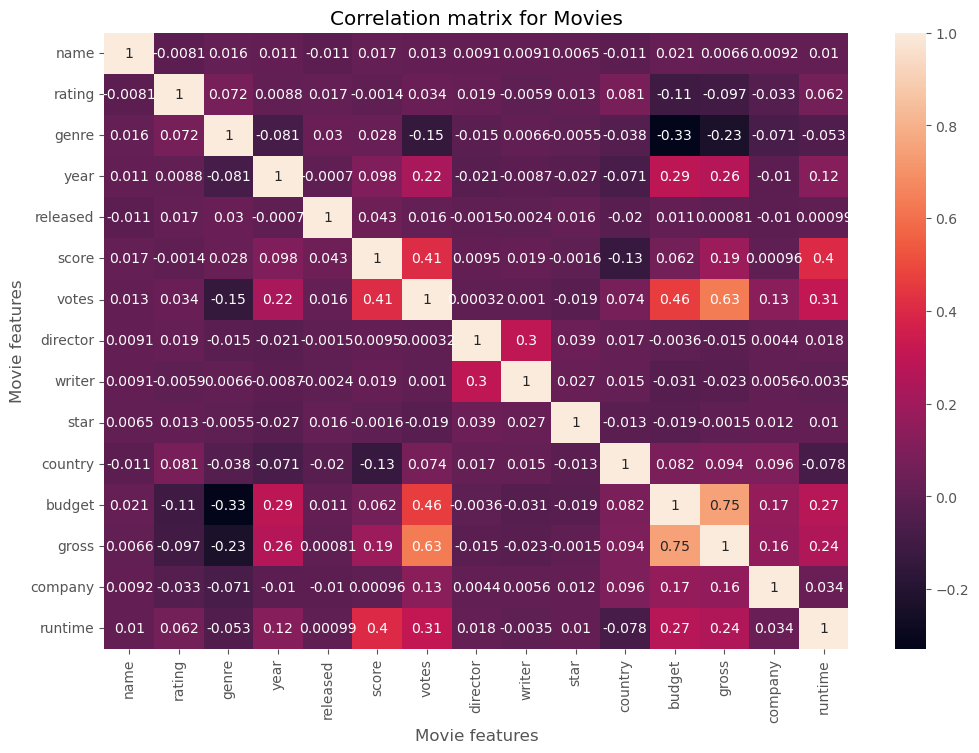

In [33]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [34]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [35]:
cat_columns = df.select_dtypes(include='object').columns

df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category').cat.codes)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149


<Axes: xlabel='rating', ylabel='gross'>

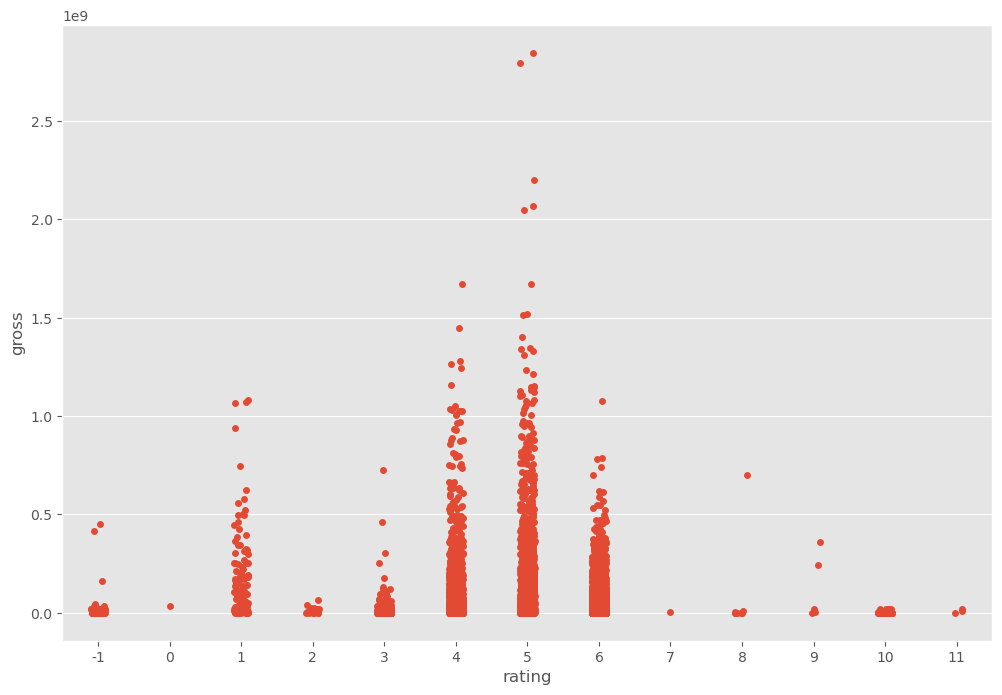

In [36]:
sns.stripplot(x="rating", y="gross", data=df)

In [37]:
# resume : 
# votes and budget have the highest correlatio to gross
# company has no correlation 